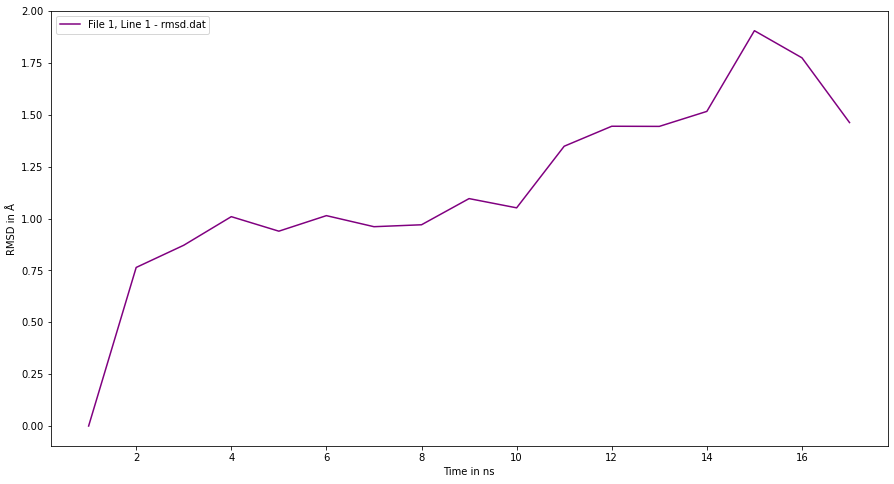

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files
file_pattern = 'rmsd.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
colors = ['purple', 'blue', 'green', 'red']

# Plot each file with a different color
for file_index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a different color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        ax.plot(x_values, y_values, label=f'File {file_index}, Line {line_index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend
ax.legend()

plt.show()

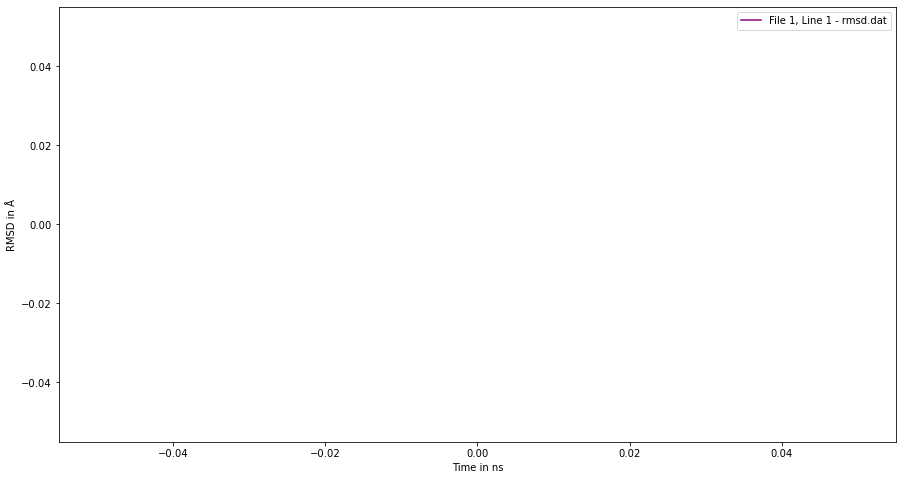

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files
file_pattern = 'rmsd.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
colors = ['purple', 'blue', 'green', 'red']

# Plot each file with a different color
for file_index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data in MD frames
    x_values_md_frames = data[:, 0]

    # Convert MD frames to time in ns (assuming 1 MD frame = 2 fs)
    x_values_ns = x_values_md_frames * 0.002

    # Convert x-axis scale to 5 ns per MD frame
    x_values_5ns_per_frame = np.arange(0, x_values_ns[-1], 5)

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Interpolate y-values for the new x-axis scale
    y_values_interp_list = [np.interp(x_values_5ns_per_frame, x_values_ns, y_values) for y_values in y_values_list.T]

    # Plot each line with a different color
    for line_index, y_values_interp in enumerate(y_values_interp_list, start=1):
        ax.plot(x_values_5ns_per_frame, y_values_interp, label=f'File {file_index}, Line {line_index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend
ax.legend()

plt.show()